In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:

# Load the dataset
file_path = 'dataset_weather.xlsx'  # Update with your file path in Colab
df = pd.read_excel(file_path)


In [ ]:
# Select features and target variable
X = df.drop(['score', 'date', 'fips'], axis=1)  # Drop non-relevant columns
y = df['score']

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model and record the history
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7973 - mae: 1.0272 - val_loss: 1.1419 - val_mae: 0.8796
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9186 - mae: 0.7806 - val_loss: 0.8413 - val_mae: 0.7247
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8343 - mae: 0.7229 - val_loss: 0.7658 - val_mae: 0.7283
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6623 - mae: 0.6480 - val_loss: 0.6865 - val_mae: 0.6843
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6748 - mae: 0.6549 - val_loss: 0.6502 - val_mae: 0.6671
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5584 - mae: 0.5994 - val_loss: 0.6290 - val_mae: 0.6555
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5779 - mae: 0.6050 - val_loss: 0.5991 - val_mae: 0.6229
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5782 - mae: 0.6089 - val_loss: 0.5654 - val_mae: 0.6131
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4720 - ma

In [ ]:
# Plot learning curves
def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


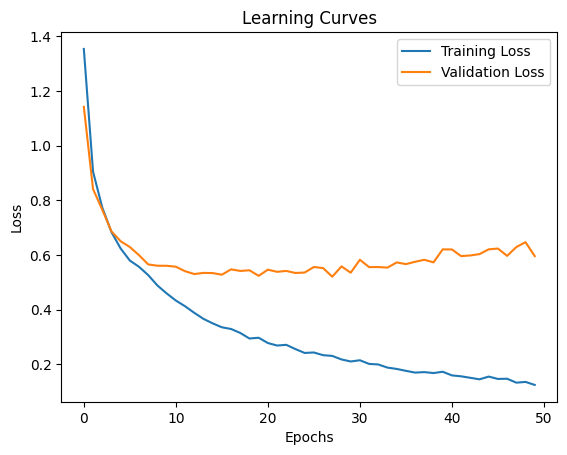

In [ ]:
plot_learning_curves(history)



In [ ]:
# Evaluate the model using RMSE
y_pred_train = model.predict(X_train_scaled)
y_pred_val = model.predict(X_val_scaled)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

In [ ]:

print(f'RMSE on Training set: {rmse_train}')
print(f'RMSE on Validation set: {rmse_val}')


RMSE on Training set: 0.32763834471878317
RMSE on Validation set: 0.771894360151878


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Select features and target variable
X = df.drop(['score', 'date', 'fips'], axis=1)  # Drop non-relevant columns
y = df['score']


In [ ]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Build the DNN model with regularization and dropout to reduce overfitting
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.9797 - mae: 1.3037 - val_loss: 1.3549 - val_mae: 0.8685
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4595 - mae: 0.8978 - val_loss: 1.0830 - val_mae: 0.7588
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2981 - mae: 0.8338 - val_loss: 0.9973 - val_mae: 0.7316
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1826 - mae: 0.7812 - val_loss: 0.9362 - val_mae: 0.7107
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0876 - mae: 0.7581 - val_loss: 0.8881 - val_mae: 0.6888
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1633 - mae: 0.7870 - val_loss: 0.8867 - val_mae: 0.6673
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1601 - mae: 0.8073 - val_loss: 0.8438 - val_mae: 0.6642
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0603 - mae: 0.7557 - val_loss: 0.8261 - val_mae: 0.6505
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.01

In [ ]:
# Plot learning curves
def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


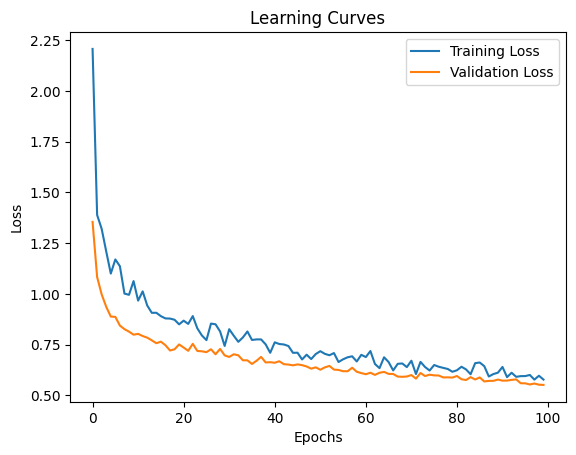

In [ ]:

plot_learning_curves(history)


In [ ]:
# Evaluate the model using RMSE
y_pred_train = model.predict(X_train_scaled)
y_pred_val = model.predict(X_val_scaled)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))


In [ ]:

print(f'RMSE on Training set: {rmse_train}')
print(f'RMSE on Validation set: {rmse_val}')


RMSE on Training set: 0.6470320710205428
RMSE on Validation set: 0.6800425425180568


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training and validation sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)

print(f'MAE on Training set: {mae_train}')
print(f'MAE on Validation set: {mae_val}')

In [ ]:
# Calculate the range of the target variable (or you can use the mean as well)
range_target = y_train.max() - y_train.min()

# Calculate RMSE percentage for training and validation sets
rmse_train_percentage = (rmse_train / range_target) * 100
rmse_val_percentage = (rmse_val / range_target) * 100

print(f'RMSE Percentage on Training set: {rmse_train_percentage}%')
print(f'RMSE Percentage on Validation set: {rmse_val_percentage}%')


RMSE Percentage on Training set: 16.17822850979004%
RMSE Percentage on Validation set: 17.00361410506718%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file_path = 'dataset_weather.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Select features and target variable
X = df.drop(['score', 'date', 'fips'], axis=1)  # Drop non-relevant columns
y = df['score']

In [ ]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# Initialize KNN regressor
knn = KNeighborsRegressor(
    n_neighbors=7,
    weights='distance',
    leaf_size=5,
    p=2,
    metric='euclidean'
)

In [ ]:
# Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(leaf_size=5, metric='euclidean', n_neighbors=7,
                    weights='distance')

In [ ]:

# Predict on training and validation data
y_pred_train = knn.predict(X_train_scaled)
y_pred_val = knn.predict(X_val_scaled)


In [ ]:
# Evaluate the model using RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))


In [ ]:

print(f'RMSE on Validation set: {rmse_val}')




RMSE on Validation set: 0.7019640353872951


In [ ]:

from sklearn.metrics import mean_absolute_error

# Calculate MAE for training and validation sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)

print(f'MAE on Training set: {mae_train}')
print(f'MAE on Validation set: {mae_val}')